# Healthy Bites

### Project Overview

 A dietary food recommendation system is a tool that is designed to help businesses in the food industry improve customer satisfaction and loyalty by providing personalized recommendations for food and drinks based on an individual's preferences and past orders. The primary objective of a food recommendation system is to increase sales and revenue by encouraging customers to try new menu items and by encouraging repeat business. This can be achieved by analyzing customer data and using machine learning algorithms to understand patterns in customer behavior and preferences, and by presenting recommendations that are tailored to the individual's tastes and needs. By using a food recommendation system, businesses can improve their customer retention rates, increase customer satisfaction, and ultimately drive growth and profitability. Dietary food recommendation systems also help individials who are on a diet and trying to maintain a healthy lifestyle plan out their daily meal intake. In this project, we will develop, train and test a Machine Learning model that analyzes users' dietary preferences, health goals, and nutritional requirements, ultimately providing personalized meal plans and recommendations.

The solution will be used in a website application or even a mobile app. The problem is an unsupervised,offline and a model based learning problem, since we are building a recommendation model from the whole unlabled data.

### Framework

The framework we will be during the development of our Machine Learning Model for this project is presented below

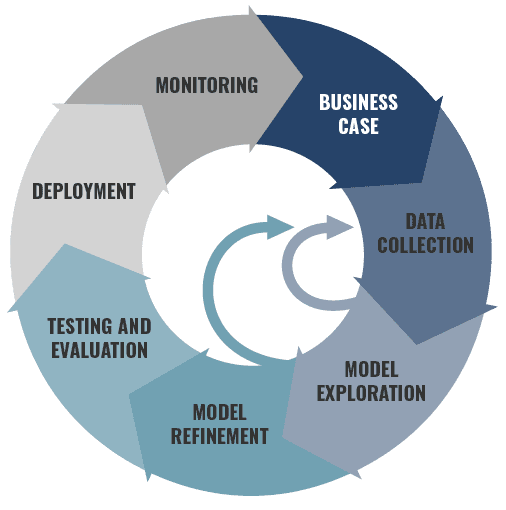

### Data Pre-Processing and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('recipes.csv')

In [3]:
data.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

In [5]:
data.shape

(522517, 28)

In [6]:
data.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,522517.000000,5.225170e+05,269294.000000,275028.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,339606.000000
mean,271821.436970,4.572585e+07,4.632014,5.227784,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510,8.606191
std,155495.878422,2.929714e+08,0.641934,20.381347,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837,114.319809
min,38.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,137206.000000,6.947400e+04,4.500000,1.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000,4.000000
50%,271758.000000,2.389370e+05,5.000000,2.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000,6.000000
75%,406145.000000,5.658280e+05,5.000000,4.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000,8.000000
max,541383.000000,2.002886e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000


In [7]:
data.tail()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
522512,541379,Meg's Fresh Ginger Gingerbread,2002090414,rdsxc,PT35M,PT1H,PT1H35M,2020-12-22T15:27:00Z,Make and share this Meg's Fresh Ginger Gingerb...,character(0),...,7.6,54.4,278.2,48.5,0.8,22.8,3.9,8.0,1 8x8 cake pan,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak..."
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,211566,Denver cooks,PT3H,PT30M,PT3H30M,2020-12-22T15:32:00Z,"White, black, green, and pink peppercorns add ...","""https://img.sndimg.com/food/image/upload/w_55...",...,71.4,433.8,766.3,3.2,0.7,0.1,117.0,8.0,1 Roast,"c(""Position rack in center of oven and preheat..."
522514,541381,Kirshwasser Ice Cream,2001131545,Jonathan F.,PT3H,PT1H,PT4H,2020-12-22T15:33:00Z,Make and share this Kirshwasser Ice Cream reci...,character(0),...,72.6,470.9,192.5,33.9,0.0,17.3,12.8,6.0,NaN,"c(""heat half and half and heavy cream to a sim..."
522515,541382,Quick & Easy Asian Cucumber Salmon Rolls,2001004241,CLUBFOODY,NaN,PT15M,PT15M,2020-12-22T22:11:00Z,"Extremely quick and easy to make, these are gr...","""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,2.9,100.5,0.3,0.0,0.1,2.4,NaN,20 rolls,"c(""In a small bowl, combine mayo and wasabi pa..."
522516,541383,Spicy Baked Scotch Eggs,188099,Chef LauraMD,PT25M,PT15M,PT40M,2020-12-22T22:12:00Z,"Great way to have hard boiled eggs and crispy,...",character(0),...,22.2,1769.7,1318.6,29.7,1.3,6.7,76.4,NaN,NaN,"c(""Mix sausage, panko, egg yolk and Wocestersh..."


In [8]:
data.nunique()

RecipeId                      522517
Name                          438188
AuthorId                       57178
AuthorName                     56793
CookTime                         490
PrepTime                         318
TotalTime                       1240
DatePublished                 245540
Description                   492838
Images                        165889
RecipeCategory                   311
Keywords                      216569
RecipeIngredientQuantities    459571
RecipeIngredientParts         497120
AggregatedRating                   9
ReviewCount                      420
Calories                       30138
FatContent                      4523
SaturatedFatContent             2533
CholesterolContent              9803
SodiumContent                  40455
CarbohydrateContent             8102
FiberContent                    1067
SugarContent                    6008
ProteinContent                  2581
RecipeServings                   171
RecipeYield                    34043
R

In [9]:
data.isnull().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

In [10]:
(data.isnull().sum()/(len(data)))*100

RecipeId                       0.000000
Name                           0.000000
AuthorId                       0.000000
AuthorName                     0.000000
CookTime                      15.797572
PrepTime                       0.000000
TotalTime                      0.000000
DatePublished                  0.000000
Description                    0.000957
Images                         0.000191
RecipeCategory                 0.143727
Keywords                       3.298840
RecipeIngredientQuantities     0.000574
RecipeIngredientParts          0.000000
AggregatedRating              48.462155
ReviewCount                   47.364775
Calories                       0.000000
FatContent                     0.000000
SaturatedFatContent            0.000000
CholesterolContent             0.000000
SodiumContent                  0.000000
CarbohydrateContent            0.000000
FiberContent                   0.000000
SugarContent                   0.000000
ProteinContent                 0.000000


In [11]:
data.isnull().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

In [12]:
copy_data = data.copy()

In [13]:
copy_data.RecipeServings = pd.to_numeric(copy_data.RecipeServings, errors='coerce')

In [14]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

In [15]:
copy_data.isnull().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

In [16]:
copy_data.loc[copy_data ['RecipeServings'].isnull() == True]

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
8,46,A Jad - Cucumber Pickle,1533,Dancer,NaN,PT25M,PT25M,1999-08-11T19:48:00Z,Make and share this A Jad - Cucumber Pickle re...,character(0),...,0.0,0.0,0.7,1.1,0.2,0.2,0.1,NaN,1 cup,"c(""Slice the cucumber in four lengthwise, then..."
9,47,Butter Pecan Cookies,1573,benluc,PT9M,PT55M,PT1H4M,1999-09-07T09:01:00Z,Make and share this Butter Pecan Cookies recip...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.4,6.3,15.0,4.5,0.6,1.6,0.8,NaN,84 cookies,"c(""Preheat oven to 350 degrees."", ""Cream butte..."
12,50,Biscotti Di Prato,1752,Bob Ross,PT50M,PT20M,PT1H10M,1999-08-31T21:19:00Z,Make and share this Biscotti Di Prato recipe f...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.3,16.6,23.5,14.5,0.8,7.3,2.3,NaN,56 biscotti,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo..."
15,53,Jimmy G's Carrot Cake,1772,Jimg2040,PT45M,PT1H5M,PT1H50M,1999-09-08T15:39:00Z,Make and share this Jimmy G's Carrot Cake reci...,character(0),...,3.2,62.0,190.0,66.2,3.4,40.9,6.6,NaN,NaN,"c(""Grease and lightly flour 2 9x1 1/2-inch rou..."
23,61,Brownie Heart Cake,1555,Cindy Hartlin,PT42M,PT35M,PT1H17M,1999-09-07T14:15:00Z,Make and share this Brownie Heart Cake recipe ...,character(0),...,144.2,1097.5,2157.8,509.9,29.0,392.5,71.7,NaN,1 Large cake,"c(""CAKE: Grease 5 cup heart shaped pan; dust ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522505,541372,Chiles Rellenos Casserole,2002090414,rdsxc,PT1H,PT1H,PT2H,2020-12-21T16:34:00Z,Make and share this Chiles Rellenos Casserole ...,character(0),...,27.3,226.8,1196.8,11.9,0.9,3.6,29.0,NaN,1 9 x 13 casserole,"c(""Preheat oven to 350F."", ""Butter a 2 quart c..."
522506,541373,Fran's Maple Blondies,2002090414,rdsxc,PT30M,PT20M,PT50M,2020-12-21T16:36:00Z,Make and share this Fran's Maple Blondies reci...,character(0),...,2.9,93.6,375.4,78.2,2.0,59.5,7.0,NaN,1 9× 13 cake pan,"c(""Preheat oven to 350F and grease a 9x13 pan ..."
522511,541378,Meg's Pumpkin Spice Bread,2001302649,Meg J.,PT45M,PT30M,PT1H15M,2020-12-22T15:26:00Z,Even people who claim they don't like pumpkin ...,"""https://img.sndimg.com/food/image/upload/w_55...",...,5.2,106.3,903.3,139.0,2.6,86.8,10.8,NaN,7-8 Mini loaves,"c(""Beat eggs, add oil, water, and pumpkin; mix..."
522515,541382,Quick & Easy Asian Cucumber Salmon Rolls,2001004241,CLUBFOODY,NaN,PT15M,PT15M,2020-12-22T22:11:00Z,"Extremely quick and easy to make, these are gr...","""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,2.9,100.5,0.3,0.0,0.1,2.4,NaN,20 rolls,"c(""In a small bowl, combine mayo and wasabi pa..."


In [17]:
(copy_data.isnull().sum())*100/copy_data.shape[0]

RecipeId                       0.000000
Name                           0.000000
AuthorId                       0.000000
AuthorName                     0.000000
CookTime                      15.797572
PrepTime                       0.000000
TotalTime                      0.000000
DatePublished                  0.000000
Description                    0.000957
Images                         0.000191
RecipeCategory                 0.143727
Keywords                       3.298840
RecipeIngredientQuantities     0.000574
RecipeIngredientParts          0.000000
AggregatedRating              48.462155
ReviewCount                   47.364775
Calories                       0.000000
FatContent                     0.000000
SaturatedFatContent            0.000000
CholesterolContent             0.000000
SodiumContent                  0.000000
CarbohydrateContent            0.000000
FiberContent                   0.000000
SugarContent                   0.000000
ProteinContent                 0.000000


In [18]:
copy_data.dropna(how = 'any', inplace = True)

In [19]:
copy_data.isnull().sum()

RecipeId                      0
Name                          0
AuthorId                      0
AuthorName                    0
CookTime                      0
PrepTime                      0
TotalTime                     0
DatePublished                 0
Description                   0
Images                        0
RecipeCategory                0
Keywords                      0
RecipeIngredientQuantities    0
RecipeIngredientParts         0
AggregatedRating              0
ReviewCount                   0
Calories                      0
FatContent                    0
SaturatedFatContent           0
CholesterolContent            0
SodiumContent                 0
CarbohydrateContent           0
FiberContent                  0
SugarContent                  0
ProteinContent                0
RecipeServings                0
RecipeYield                   0
RecipeInstructions            0
dtype: int64

In [20]:
ana_copy_data=data.copy()

In [21]:
#Group the tenure into bins of 12 months
labels = ["{0}-{1}".format(i, i + 11) for i in range(1, 72, 12)]

copy_data['Calories'] = pd.cut(data.Calories, range(1, 80, 12), right=False, labels=labels)

copy_data.drop(columns='Calories', axis=1, inplace=True)
copy_data.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
5,43,Best Blackbottom Pie,34879,Barefoot Beachcomber,PT2H,PT20M,PT2H20M,1999-08-21T10:35:00Z,Make and share this Best Blackbottom Pie recip...,character(0),...,10.9,94.3,267.6,58.0,1.8,42.5,7.0,8.0,1 9-inch pie,"c(""Graham Cracker Crust: In small bowl, combin..."
16,54,Carrot Cake,1535,Marg CaymanDesigns,PT50M,PT45M,PT1H35M,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,4.9,69.8,534.8,67.0,1.6,47.9,5.0,12.0,1 bundt,"c(""Beat together the eggs, oil, and white suga..."
26,64,Almond Pound Cake,125579,GrandmaIsCooking,PT1H,PT15M,PT1H15M,1999-08-07T16:33:00Z,Make and share this Almond Pound Cake recipe f...,character(0),...,9.0,118.9,159.4,56.0,1.3,29.0,6.9,10.0,1 cake,"c(""Preheat oven to 350 degrees Fahrenheit."", ""..."
54,94,Blueberry Buttertarts,1556,Strawberry Girl,PT25M,PT15M,PT40M,1999-09-12T05:46:00Z,Make and share this Blueberry Buttertarts reci...,character(0),...,4.7,17.6,125.7,40.2,1.2,11.5,4.2,12.0,12 tarts,"c(""Preheat oven to 375F."", ""Leave shells in fo..."


In [22]:
ana_copy_data.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,522517.000000,5.225170e+05,269294.000000,275028.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,339606.000000
mean,271821.436970,4.572585e+07,4.632014,5.227784,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510,8.606191
std,155495.878422,2.929714e+08,0.641934,20.381347,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837,114.319809
min,38.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,137206.000000,6.947400e+04,4.500000,1.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000,4.000000
50%,271758.000000,2.389370e+05,5.000000,2.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000,6.000000
75%,406145.000000,5.658280e+05,5.000000,4.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000,8.000000
max,541383.000000,2.002886e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000


In [23]:
ana_copy_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RecipeId,522517.0,NaN,NaN,NaN,271821.43697,155495.878422,38.0,137206.0,271758.0,406145.0,541383.0
Name,522517,438188,Banana Bread,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AuthorId,522517.0,NaN,NaN,NaN,45725847.894476,292971448.66643,27.0,69474.0,238937.0,565828.0,2002886148.0
AuthorName,522517,56793,ratherbeswimmin,7742,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CookTime,439972,490,PT30M,50715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrepTime,522517,318,PT10M,120265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalTime,522517,1240,PT30M,41590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DatePublished,522517,245540,1999-12-01T20:03:00Z,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,522512,492838,Make and share this Banana Bread recipe from F...,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Images,522516,165889,character(0),356620,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Feature Extraction

In [24]:
#separating categorical and numerical features before analysis
cat_cols=ana_copy_data.select_dtypes(include=['object']).columns
num_cols = ana_copy_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'AuthorName', 'CookTime', 'PrepTime', 'TotalTime',
       'DatePublished', 'Description', 'Images', 'RecipeCategory', 'Keywords',
       'RecipeIngredientQuantities', 'RecipeIngredientParts', 'RecipeYield',
       'RecipeInstructions'],
      dtype='object')
Numerical Variables:
['RecipeId', 'AuthorId', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings']


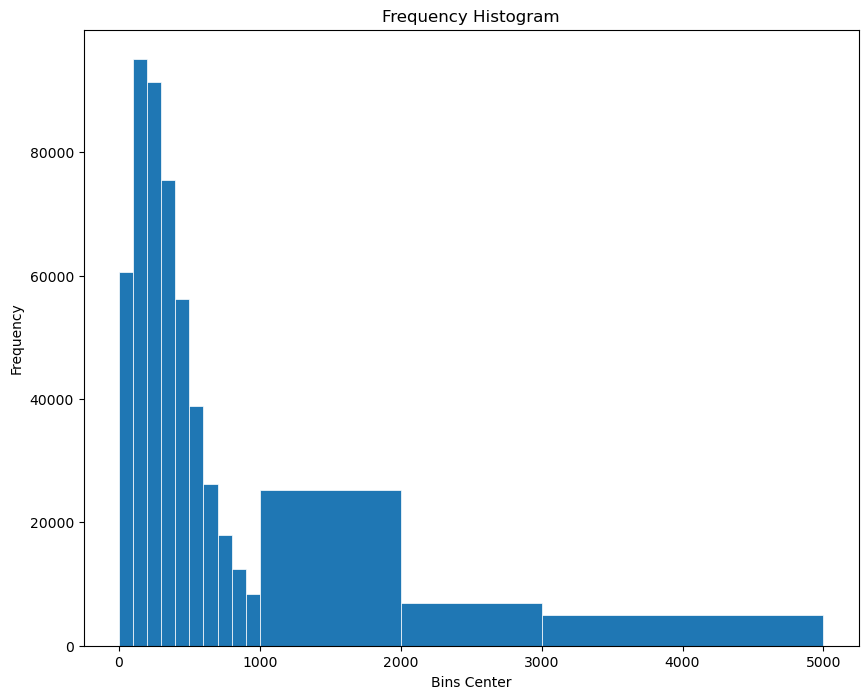

In [25]:
#Univariate Analysis 
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(data.Calories.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1000,2000,3000,5000],linewidth=0.5, edgecolor="white")
plt.show()

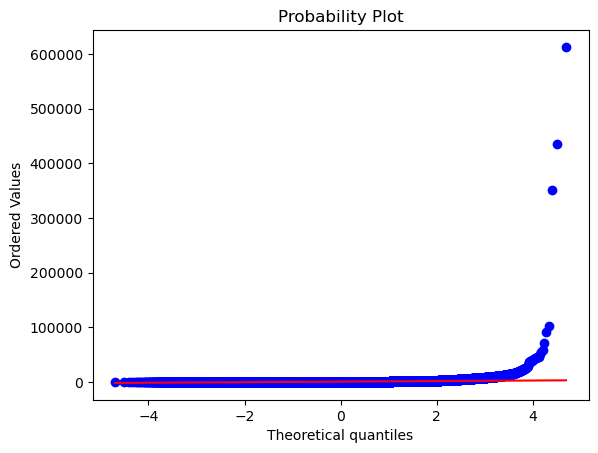

In [26]:
import pylab 
import scipy.stats as stats
stats.probplot(data.Calories.to_numpy(), dist="norm", plot=pylab)
pylab.show()

In [27]:
dataset=data.copy()
columns=['RecipeId','Name','CookTime','PrepTime','TotalTime','RecipeIngredientParts','Calories','FatContent',
         'SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent',
         'SugarContent','ProteinContent','RecipeInstructions']
dataset=dataset[columns]

In [28]:
max_Calories=2000
max_daily_fat=100
max_daily_Saturatedfat=13
max_daily_Cholesterol=300
max_daily_Sodium=2300
max_daily_Carbohydrate=325
max_daily_Fiber=40
max_daily_Sugar=40
max_daily_Protein=200
max_list=[max_Calories,max_daily_fat,max_daily_Saturatedfat,max_daily_Cholesterol,max_daily_Sodium,
          max_daily_Carbohydrate,max_daily_Fiber,max_daily_Sugar,max_daily_Protein]

In [29]:
extracted_data=dataset.copy()
for column,maximum in zip(extracted_data.columns[6:15],max_list):
    extracted_data=extracted_data[extracted_data[column]<maximum]

In [30]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375703 entries, 0 to 522515
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               375703 non-null  int64  
 1   Name                   375703 non-null  object 
 2   CookTime               313207 non-null  object 
 3   PrepTime               375703 non-null  object 
 4   TotalTime              375703 non-null  object 
 5   RecipeIngredientParts  375703 non-null  object 
 6   Calories               375703 non-null  float64
 7   FatContent             375703 non-null  float64
 8   SaturatedFatContent    375703 non-null  float64
 9   CholesterolContent     375703 non-null  float64
 10  SodiumContent          375703 non-null  float64
 11  CarbohydrateContent    375703 non-null  float64
 12  FiberContent           375703 non-null  float64
 13  SugarContent           375703 non-null  float64
 14  ProteinContent         375703 non-nu

In [31]:
extracted_data.iloc[:,6:15].corr()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
Calories,1.000000,0.767356,0.603317,0.478934,0.501082,0.711640,0.458711,0.180895,0.689447
FatContent,0.767356,1.000000,0.767357,0.440515,0.381944,0.223549,0.192142,0.042603,0.468088
SaturatedFatContent,0.603317,0.767357,1.000000,0.512186,0.319671,0.176623,0.044003,0.090721,0.388618
CholesterolContent,0.478934,0.440515,0.512186,1.000000,0.335843,0.066104,-0.047346,-0.036112,0.675302
SodiumContent,0.501082,0.381944,0.319671,0.335843,1.000000,0.294636,0.260479,-0.055518,0.500457
CarbohydrateContent,0.711640,0.223549,0.176623,0.066104,0.294636,1.000000,0.580535,0.390120,0.255447
FiberContent,0.458711,0.192142,0.044003,-0.047346,0.260479,0.580535,1.000000,0.068758,0.273488
SugarContent,0.180895,0.042603,0.090721,-0.036112,-0.055518,0.390120,0.068758,1.000000,-0.120441
ProteinContent,0.689447,0.468088,0.388618,0.675302,0.500457,0.255447,0.273488,-0.120441,1.000000


In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
prep_data=scaler.fit_transform(extracted_data.iloc[:,6:15].to_numpy())

In [33]:
prep_data

array([[-0.55093359, -0.91281917, -0.77924852, ...,  0.15672078,
         2.35502102, -0.68338127],
       [ 1.47428542,  1.13139595, -0.0647135 , ...,  3.91055068,
         2.56324444,  1.25158691],
       [-0.92414618, -1.11248669, -1.12222533, ...,  0.4855234 ,
         0.98513013, -0.60183088],
       ...,
       [ 0.49162165,  0.73206091,  1.85024037, ..., -0.61048534,
         1.76322815, -0.56476253],
       [ 0.25704672,  0.03797856,  1.02137974, ..., -0.61048534,
         1.54404561, -0.63148557],
       [-1.40937801, -1.09347074, -1.12222533, ..., -0.82968708,
        -0.94367625, -0.74269064]])

### Model Development

In [34]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(metric='cosine',algorithm='brute')
neigh.fit(prep_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

In [36]:
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

In [37]:
pipeline.transform(extracted_data.iloc[0:1,6:15].to_numpy())[0]

array([     0, 333440, 349044, 109248,  19679, 156831, 144322, 301119,
       262699, 332342])

### Testing The Model

In [38]:
extracted_data.iloc[pipeline.transform(extracted_data.iloc[0:1,6:15].to_numpy())[0]]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
463750,480841,Mango Salsa,PT5M,PT10M,PT15M,"c(""fresh mango"", ""tomatoes"", ""sweet onion"", ""f...",152.5,0.8,0.2,0.0,6.6,37.9,3.8,34.0,2.2,"c(""In a medium-sized bowl, whisk together vine..."
485171,503065,Glazed Pineapple With Cinnamon Creme Fraiche,PT10M,PT10M,PT20M,"c(""lime"", ""honey"", ""ground cinnamon"", ""ground ...",172.5,2.2,1.2,5.0,19.8,41.5,3.8,32.4,1.4,"c(""Mix the lime juice and half the lime zest w..."
158110,165636,Lemon Float Punch,PT120H,PT5M,PT120H5M,"c(""lemons"", ""sugar"", ""water"", ""ginger ale"", ""l...",158.4,1.7,0.9,0.4,38.6,40.1,4.0,31.1,1.9,"c(""Combine lemon juice and sugar; stir to diss..."
28595,32172,L & B's Concoction,PT5M,PT5M,PT10M,"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"c(""Blend the frozen strawberries, ice cubes, y..."
224062,233508,Blueberry Mango Smoothie,NaN,PT5M,PT5M,"c(""vanilla-flavored soymilk"", ""frozen blueberr...",147.5,0.4,0.1,0.0,2.9,39.5,4.2,34.9,0.9,"""Place all ingredients in a blender. Blend un..."
206883,215824,Blueberry Orange Smoothie,NaN,PT5M,PT5M,"c(""blueberries"", ""fresh blueberries"")",179.4,2.6,1.3,0.7,34.3,38.1,3.0,30.4,3.1,"c(""Combine first 5 ingredients in blender."", ""..."
419537,434977,Preserved Apple Pie Filling,PT30M,PT1H,PT1H30M,"c(""apples"", ""bottled lemon juice"", ""sugar"", ""g...",161.3,0.3,0.1,0.0,3.6,42.2,3.8,36.4,0.4,"c(""Set a large pot of water to boil."", ""Pour 1..."
367808,381181,Tropical Twister Smoothies,NaN,PT5M,PT5M,"c(""fresh mango"", ""papaya"", ""fresh pineapple ch...",190.8,2.6,1.4,8.0,32.4,41.3,3.6,29.6,4.0,"c(""Combine all ingredients in a blender and pr..."
462235,479288,Summer Fruit Bowl,NaN,PT1H30M,PT1H30M,"c(""blueberries"", ""granulated sugar"", ""kirsch"",...",155.4,0.2,0.0,0.0,10.2,40.6,3.8,36.2,1.7,"c(""Place fruit in a large bowl."", ""Add sugar a..."


### Training and Fine-Tuning The Model

#### K-NEAREST NEIGHBOUR 

In [39]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

In [40]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Create and train a k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [44]:
# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [45]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

Accuracy: 0.945
Precision: [0.48       0.92929293 1.        ]
Recall: [1.         0.95833333 0.        ]
F1 Score: 0.9435897435897437
ROC AUC Score: 0.9455128205128206
Confusion Matrix:
 [[97  7]
 [ 4 92]]


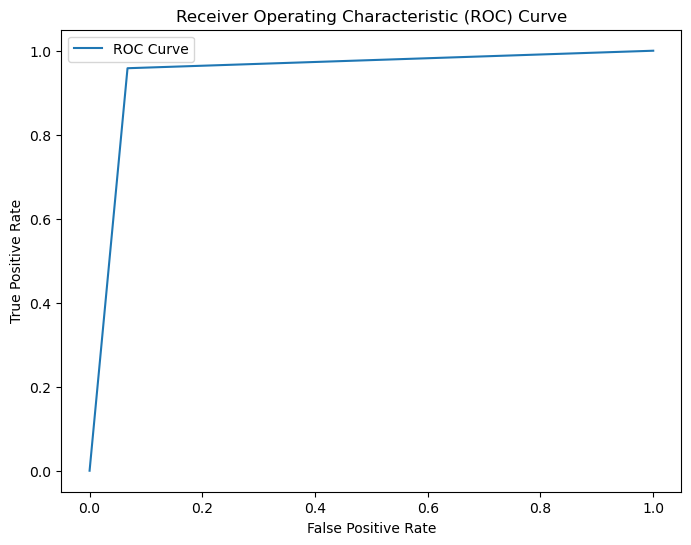

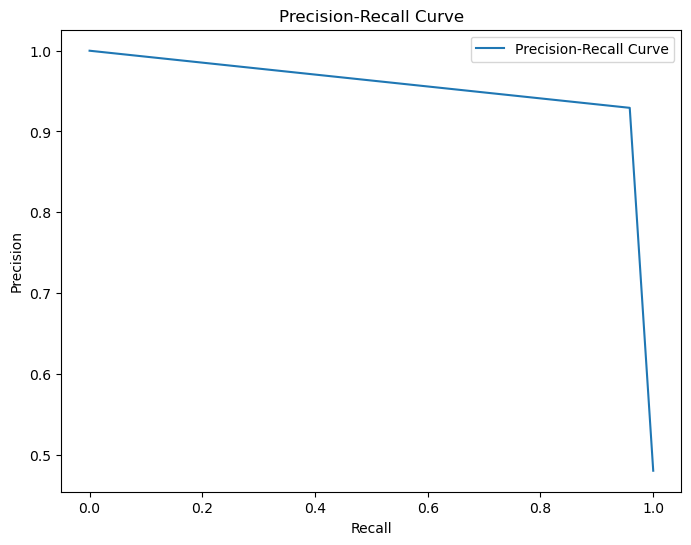

In [46]:
# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

#### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Create and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [52]:
# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [53]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

In [54]:
# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.92
Precision: [0.48       0.89215686 1.        ]
Recall: [1.         0.94791667 0.        ]
F1 Score: 0.9191919191919192
ROC AUC Score: 0.921073717948718
Confusion Matrix:
 [[93 11]
 [ 5 91]]


#### Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Create and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [59]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

In [60]:
# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [61]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

In [62]:
# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.835
Precision: [0.48       0.78378378 1.        ]
Recall: [1.      0.90625 0.     ]
F1 Score: 0.8405797101449275
ROC AUC Score: 0.8377403846153846
Confusion Matrix:
 [[80 24]
 [ 9 87]]


#### Gaussian Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [66]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [67]:
# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [68]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

In [69]:
# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.865
Precision: [0.48      0.8556701 1.       ]
Recall: [1.         0.86458333 0.        ]
F1 Score: 0.8601036269430052
ROC AUC Score: 0.8649839743589745
Confusion Matrix:
 [[90 14]
 [13 83]]


In [70]:
extracted_data[extracted_data['RecipeIngredientParts'].str.contains("egg",regex=False)]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
12,50,Biscotti Di Prato,PT50M,PT20M,PT1H10M,"c(""flour"", ""sugar"", ""baking powder"", ""salt"", ""...",89.4,2.6,0.3,16.6,23.5,14.5,0.8,7.3,2.3,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo..."
18,56,Buttermilk Pie,PT1H,PT20M,PT1H20M,"c(""butter"", ""margarine"", ""sugar"", ""flour"", ""eg...",395.9,19.1,9.8,101.5,269.8,52.2,0.7,39.9,5.0,"c(""Preheat oven to 400°F."", ""Beat the butter a..."
22,60,Blueberry Dessert,NaN,PT35M,PT35M,"c(""Bisquick baking mix"", ""sugar"", ""butter"", ""m...",381.1,17.3,8.8,62.1,437.6,54.5,1.6,36.9,3.9,"c(""Heat oven to 400 degrees."", ""Mix 2 cups bak..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522484,541351,Spinach & Mushroom Quiche with Boursin,PT1H,PT20M,PT1H20M,"c(""butter"", ""onion"", ""sweet pepper"", ""carrots""...",197.6,11.0,4.0,82.2,283.3,19.0,2.0,3.0,6.1,"c(""Bake pie crust(s) according to package inst..."
522490,541357,Chocolate Rum Snowballs,PT8M,PT15M,PT23M,"c(""rolled oats"", ""sweetened flaked coconut"", ""...",127.8,6.2,4.1,14.9,57.9,15.8,1.3,9.4,1.8,"c(""In a large mixing bowl, combine oats, 1 cup..."
522500,541367,Thick Peanut Pancakes,PT10M,PT45M,PT55M,"c(""plain flour"", ""baking powder"", ""baking soda...",712.9,25.4,8.6,121.4,503.9,100.3,6.0,20.2,23.2,"c(""Add rock sugar to milk."", ""Steam milk at lo..."
522510,541377,Slow-Cooker Classic Coffee Cake,PT3H,PT20M,PT3H20M,"c(""all-purpose flour"", ""brown sugar"", ""butter""...",358.9,19.8,10.5,103.1,323.4,41.5,0.8,24.8,4.8,"c(""Line bottom and sides of 5-quart oval slow ..."


### Creating an End-To-End Function and Comparing Model Results

In [71]:
def scaling(dataframe):
    scaler=StandardScaler()
    prep_data=scaler.fit_transform(dataframe.iloc[:,6:15].to_numpy())
    return prep_data,scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine',algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh,scaler,params):
    transformer = FunctionTransformer(neigh.kneighbors,kw_args=params)
    pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
    return pipeline

def extract_data(dataframe,ingredient_filter,max_nutritional_values):
    extracted_data=dataframe.copy()
    for column,maximum in zip(extracted_data.columns[6:15],max_nutritional_values):
        extracted_data=extracted_data[extracted_data[column]<maximum]
    if ingredient_filter!=None:
        for ingredient in ingredient_filter:
            extracted_data=extracted_data[extracted_data['RecipeIngredientParts'].str.contains(ingredient,regex=False)] 
    return extracted_data

def apply_pipeline(pipeline,_input,extracted_data):
    return extracted_data.iloc[pipeline.transform(_input)[0]]

def recommand(dataframe,_input,max_nutritional_values,ingredient_filter=None,params={'return_distance':False}):
    extracted_data=extract_data(dataframe,ingredient_filter,max_nutritional_values)
    prep_data,scaler=scaling(extracted_data)
    neigh=nn_predictor(prep_data)
    pipeline=build_pipeline(neigh,scaler,params)
    return apply_pipeline(pipeline,_input,extracted_data)

In [72]:
test_input=extracted_data.iloc[0:1,6:15].to_numpy()
recommand(dataset,test_input,max_list)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
463750,480841,Mango Salsa,PT5M,PT10M,PT15M,"c(""fresh mango"", ""tomatoes"", ""sweet onion"", ""f...",152.5,0.8,0.2,0.0,6.6,37.9,3.8,34.0,2.2,"c(""In a medium-sized bowl, whisk together vine..."
485171,503065,Glazed Pineapple With Cinnamon Creme Fraiche,PT10M,PT10M,PT20M,"c(""lime"", ""honey"", ""ground cinnamon"", ""ground ...",172.5,2.2,1.2,5.0,19.8,41.5,3.8,32.4,1.4,"c(""Mix the lime juice and half the lime zest w..."
158110,165636,Lemon Float Punch,PT120H,PT5M,PT120H5M,"c(""lemons"", ""sugar"", ""water"", ""ginger ale"", ""l...",158.4,1.7,0.9,0.4,38.6,40.1,4.0,31.1,1.9,"c(""Combine lemon juice and sugar; stir to diss..."
28595,32172,L & B's Concoction,PT5M,PT5M,PT10M,"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"c(""Blend the frozen strawberries, ice cubes, y..."


In [73]:
dataset.to_csv('final dataset.csv',index=False)
dataset.to_json('final dataset.json')

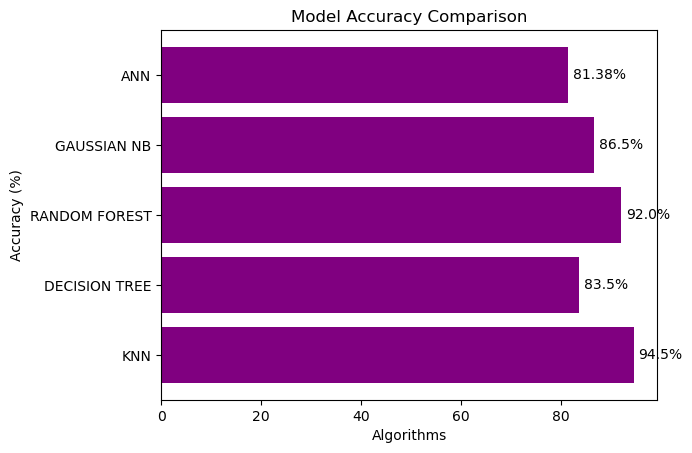

In [74]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ['KNN', 'DECISION TREE','RANDOM FOREST','GAUSSIAN NB','ANN']

# Corresponding accuracy values
accuracy = [94.50,83.50,92.00,86.50,81.38]

# Create a bar graph
plt.barh(algorithms, accuracy, color='purple')

# Add labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
for i in range(len(algorithms)):
    plt.text(accuracy[i] + 1, i, f'{accuracy[i]}%', ha='left', va='center')


# Show the plot
plt.show()

We can conclude that the model performs best using the K-Nearest Neighbour algorithm with an accurace of 94.5% while the worst-case scenario is when the model's performance using ANN with an accuracy of 81.38%